In [1]:
#After predicting disordered residues with iupred,
#each string of contiguous disordered residues was
#saved an item in a dictionary. Likewise, there is 
#a dictionary for all ordered domains and a
#dictionary that contains the entirety of every
#proteins sequence proteome-wide. These dictionaries
#were then exported as a pickle bundle which this
#bit of code unpacks and converts to a dictinary.

import pickle as pkl

disorderdictionary = open('UP000000803DisorderDict.pkl', 'rb')
ProteomeDisorderDict = pkl.load(disorderdictionary)

orderdictionary = open('UP000000803OrderDict.pkl', 'rb')
ProteomeOrderDict = pkl.load(orderdictionary)

proteomedictionary = open('UP000000803ProteomeDict.pkl', 'rb')
ProteomeDict =  pkl.load(proteomedictionary)

In [2]:
#All DmCdt1 IDR info and all dipeptide permutations

dmcdt1 = {'DmCdt1 IDR':'MAQPSVAAFFTNRKRAALDDAISIKNRRLVEPAETVSPASAPSQLPAGDQDADLDTLKAAATGMRTRSGRTARLIVTAAQESKKKTPAAAKMEPHIKQPKLVQFIKKGTLSPRKQAQSSKLDEEELQQSSAISEHTPKVNFTITSQQNADNVQRGLRTPTKQILKDASPIKADLRRQLTFDEVKTKVSRSAKLQELKAVLALKAALEQKRKEQEERNRKLRDAGPSPSKSKMSVQLKEFDTIELEVLISPLKTFKTPTKIPPPTPDKHELMSPRHTDVSKRLLFSPAKNGSPVKLVE'}

dmcdt1_aa_percents = {'DmCdt1 IDR': {'M': 0.016835016835016835, 'A': 0.10774410774410774, 'Q': 0.06397306397306397, 'P': 0.07744107744107744, 'S': 0.08754208754208755, 'V': 0.050505050505050504, 'F': 0.026936026936026935, 'T': 0.07407407407407407, 'N': 0.02356902356902357, 'R': 0.06734006734006734, 'K': 0.11784511784511785, 'L': 0.09427609427609428, 'D': 0.050505050505050504, 'I': 0.04040404040404041, 'E': 0.06397306397306397, 'G': 0.02356902356902357, 'H': 0.013468013468013467, 'C': 0.0, 'W': 0.0, 'Y': 0.0}}

amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

def concatenator(aa_list):
    #generates all dipeptides and puts them into a list
    def helper(amino_acid, amino_list):
        dipeptide_list = []
        for amino in amino_list:
            dipeptide_list.append(amino_acid + amino)
        return dipeptide_list
    dipeptides = []
    for aa in aa_list:
        output = helper(aa, aa_list)
        dipeptides.extend(output)
    return dipeptides

dipeptide_list = concatenator(amino_acids)

In [3]:
#Code for Amino Acid Percentages

def aa_percent_dict(dict):
    #returns nested dictionary with the values being a dictionary of all present amino acids percentages
    protein_dict = {}
    for key in dict:
        aa_amounts = {}
        seq = dict[key]
        length = len(seq)
        if len(seq) > 100:
            while seq:
                if seq[0] in aa_amounts:
                    aa_amounts[seq[0]] += (1 / length)
                    seq = seq[1:]
                else:
                    aa_amounts[seq[0]] = (1 / length)
                    seq = seq[1:]
            for aa in ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']:
                if aa not in aa_amounts:
                    aa_amounts[aa] = 0
            protein_dict[key] = aa_amounts
    return protein_dict

def aa_percent_nested_dict(nested_dict):
    nested_protein_dict = {}
    for key in nested_dict:
        counter = aa_percent_dict(nested_dict[key])
        nested_protein_dict[key] = counter
    return nested_protein_dict

In [4]:
#For finding the expected probability based on just amino acid percentages

def dipeptide_probability_dict(percent_dict):
    #returns dictionary with dipeptide and probability of it occurring
    dipeptide_prob_dict = {}
    for key in percent_dict:
        prob_dict = {}
        for dipeptide in dipeptide_list:
            aa1 = percent_dict[key][dipeptide[0]]
            aa2 = percent_dict[key][dipeptide[1]]
            prob_dict[dipeptide] = aa1 * aa2
        dipeptide_prob_dict[key] = prob_dict
    return dipeptide_prob_dict

def dipeptide_probability_nested_dict(nested_percent_dict):
    dipeptide_prob_nested_dict = {}
    for key in nested_percent_dict:
        protein_prob = dipeptide_probability_dict(nested_percent_dict[key])
        dipeptide_prob_nested_dict[key] = protein_prob
    return dipeptide_prob_nested_dict

In [5]:
#For counting the number of dipeptides in a dict or nested dict

def dipeptide_counter(sequence):
    #returns a dict of every dipeptide and its frequency
    #includes all dipeptides with counts of 0
    dipeptide_counter_dict = {}
    while len(sequence) > 1:
        if sequence[0:2] in dipeptide_counter_dict:
            dipeptide_counter_dict[sequence[0:2]] += 1
            sequence = sequence[1:]
        else:
            dipeptide_counter_dict[sequence[0:2]] = 1
            sequence = sequence[1:]
    for dipeptide in dipeptide_list:
        if dipeptide not in dipeptide_counter_dict:
            dipeptide_counter_dict[dipeptide] = 0
    return dipeptide_counter_dict

def dict_dipeptide_counter(dict):
    protein_dipeptide_count_dict = {}
    for key in dict:
        if len(dict[key]) > 100:
            dipeptide_count = dipeptide_counter(dict[key])
            protein_dipeptide_count_dict[key] = dipeptide_count
    return protein_dipeptide_count_dict

def nested_dict_dipeptide_counter(nested_dict):
    nested_protein_dipeptide_count_dict = {}
    for key in nested_dict:
        nested_dipeptide_count = dict_dipeptide_counter(nested_dict[key])
        nested_protein_dipeptide_count_dict[key] = nested_dipeptide_count
    return nested_protein_dipeptide_count_dict

In [6]:
#For finding the observed probability of dipeptides

def observed_probability(sequence):
    observed_dict = {}
    length = len(sequence) - 1
    while len(sequence) > 1:
        if sequence[0:2] in observed_dict:
            observed_dict[sequence[0:2]] += 1 / length
            sequence = sequence[1:]
        else:
            observed_dict[sequence[0:2]] = 1 / length
            sequence = sequence[1:]
    for dipeptide in dipeptide_list:
        if dipeptide not in observed_dict:
            observed_dict[dipeptide] = 0
    return observed_dict

def dict_observed_probability(dict):
    observed_probability_dict = {}
    for key in dict:
        if len(dict[key]) > 100:
            observed = observed_probability(dict[key])
            observed_probability_dict[key] = observed
    return observed_probability_dict

def nested_dict_observed_probability(nested_dict):
    nested_observed_probability_dict = {}
    for key in nested_dict:
        nested_observed = dict_observed_probability(nested_dict[key])
        nested_observed_probability_dict[key] = nested_observed
    return nested_observed_probability_dict  

In [7]:
#For normalizing the probability

def dict_normalizer(expected_dict, observed_dict):
    normalized_dict = {}
    for key in observed_dict:
        seq_dict = {}
        for dipeptide in observed_dict[key]:
            if dipeptide in expected_dict[key] and expected_dict[key][dipeptide]:
                seq_dict[dipeptide] = observed_dict[key][dipeptide] / expected_dict[key][dipeptide]
            else:
                seq_dict[dipeptide] = 1
        normalized_dict[key] = seq_dict
    return normalized_dict

def nested_dict_normalizer(expected_nested_dict, observed_nested_dict):
    normalized_nested_dict = {}
    for key in observed_nested_dict:
        normalized_dict = dict_normalizer(expected_nested_dict[key], observed_nested_dict[key])
        normalized_nested_dict[key] = normalized_dict
    return normalized_nested_dict

In [8]:
#DmCdt1 IDR Data

dmcdt1_expected_probability = dipeptide_probability_dict(dmcdt1_aa_percents)
dmcdt1_observed_probability = dict_observed_probability(dmcdt1)
dmcdt1_normalized = dict_normalizer(dmcdt1_expected_probability, dmcdt1_observed_probability)

#print(dmcdt1_expected_probability)
#print(dmcdt1_observed_probability)
print(dmcdt1_normalized)

{'DmCdt1 IDR': {'MA': 1.862521114864865, 'AQ': 1.4704114064722618, 'QP': 1.3638598552786196, 'PS': 1.9933336346379826, 'SV': 1.528222453222453, 'VA': 0.6208403716216218, 'AA': 2.3281513935810816, 'AF': 1.1640756967905408, 'FF': 4.656302787162163, 'FT': 3.3864020270270276, 'TN': 1.9350868725868728, 'NR': 6.38578667953668, 'RK': 1.702876447876448, 'KR': 1.277157335907336, 'RA': 0.46563027871621626, 'AL': 0.9977791686776062, 'LD': 2.12859555984556, 'DD': 1.3244594594594596, 'DA': 2.483361486486487, 'AI': 1.552100929054054, 'IS': 2.8654170997920994, 'SI': 0.9551390332640332, 'IK': 2.838127413127413, 'KN': 2.432680639823497, 'RR': 1.4900168918918921, 'RL': 1.59644666988417, 'LV': 2.12859555984556, 'VE': 2.0912517780938833, 'EP': 1.3638598552786196, 'PA': 2.0244794726792015, 'AE': 0.49013713549075394, 'ET': 0.7129267425320058, 'TV': 0.9030405405405406, 'VS': 2.2923336798336797, 'SP': 3.9866672692759653, 'AS': 0.7163542749480251, 'SA': 1.0745314124220375, 'AP': 0.40489589453584024, 'SQ': 1.20

In [9]:
#Drosophila Proteome

proteome_aa_percent = aa_percent_dict(ProteomeDict)
proteome_expected_probability = dipeptide_probability_dict(proteome_aa_percent)
proteome_observed_probability = dict_observed_probability(ProteomeDict)
#There seems to be an incorrect amino acid (U)
proteome_normalized = dict_normalizer(proteome_expected_probability, proteome_observed_probability)

In [10]:
#Drosophila Disorderome

disorder_aa_percent = aa_percent_nested_dict(ProteomeDisorderDict)
disorder_expected_probability = dipeptide_probability_nested_dict(disorder_aa_percent)
disorder_observed_probability = nested_dict_observed_probability(ProteomeDisorderDict)
disorder_normalized = nested_dict_normalizer(disorder_expected_probability, disorder_observed_probability)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Peptide1', 'Peptide2', 'Observed/Expected']
data = [[dipeptide[0], dipeptide[1], dmcdt1_normalized['DmCdt1 IDR'][dipeptide]] 
        for dipeptide in dmcdt1_normalized['DmCdt1 IDR']]
dmcdt1_dipeptide_table = pd.DataFrame(data, columns=labels, dtype=float)
print(dmcdt1_dipeptide_table)

    Peptide1 Peptide2  Observed/Expected
0          M        A           1.862521
1          A        Q           1.470411
2          Q        P           1.363860
3          P        S           1.993334
4          S        V           1.528222
..       ...      ...                ...
395        Y        S           1.000000
396        Y        T           1.000000
397        Y        V           1.000000
398        Y        W           1.000000
399        Y        Y           1.000000

[400 rows x 3 columns]


In [15]:
dmcdt1_dipeptide_table['CWY'] = (dmcdt1_dipeptide_table['Peptide1'] == 'C') | (dmcdt1_dipeptide_table['Peptide1'] == 'W') | (dmcdt1_dipeptide_table['Peptide1'] == 'Y') | (dmcdt1_dipeptide_table['Peptide2'] == 'C') | (dmcdt1_dipeptide_table['Peptide2'] == 'W') | (dmcdt1_dipeptide_table['Peptide2'] == 'Y')
dmcdt1_dipeptide_table

,Peptide1,Peptide2,Observed/Expected,CWY
0,M,A,1.862521,False
1,A,Q,1.470411,False
2,Q,P,1.363860,False
3,P,S,1.993334,False
4,S,V,1.528222,False
...,...,...,...,...
395,Y,S,1.000000,True
396,Y,T,1.000000,True
397,Y,V,1.000000,True
398,Y,W,1.000000,True


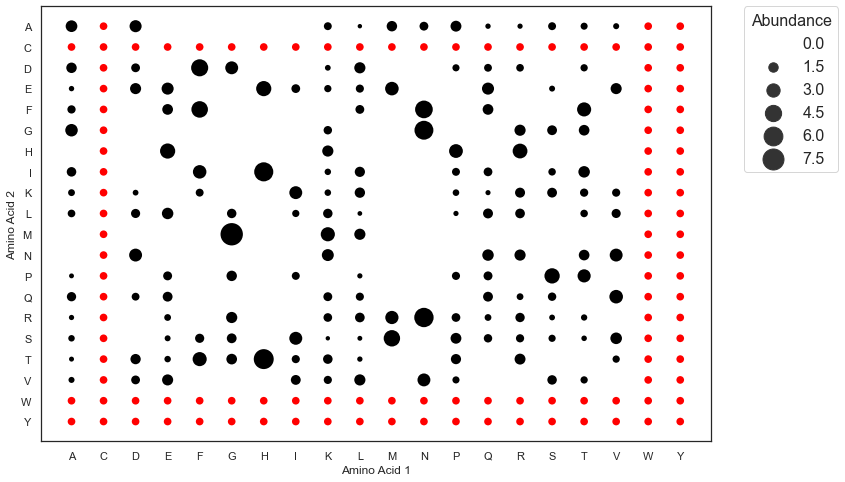

In [30]:
sns.set()
sns.set_style(style='white')

fig = plt.gcf()
fig.set_size_inches(12, 8)

#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

ax = sns.scatterplot(x="Peptide1", y="Peptide2", hue='CWY', palette=['black', 'red'],
                     size="Observed/Expected",
                     sizes=(0, 500),
                     data=dmcdt1_dipeptide_table.sort_values(['Peptide1', 'Peptide2']))

ax.grid(False)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[4:], labels=labels[4:], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=16, title='Abundance', title_fontsize=16)

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=16, title='Abundance', title_fontsize=16)

plt.xlabel('Amino Acid 1')
plt.ylabel('Amino Acid 2')
plt.savefig('Adjacent Amino Acid Abundances', bbox_inches='tight')

#try to change the color of the C, W, Y
#at the moment, I'm going to remove values of C, W, Y

<ipython-input-13-1051df004faa>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dmcdt1_noCWY = dmcdt1_noCWY[(dmcdt1_dipeptide_table['Peptide2'] != 'C') & (dmcdt1_dipeptide_table['Peptide2'] != 'W') & (dmcdt1_dipeptide_table['Peptide2'] != 'Y')]


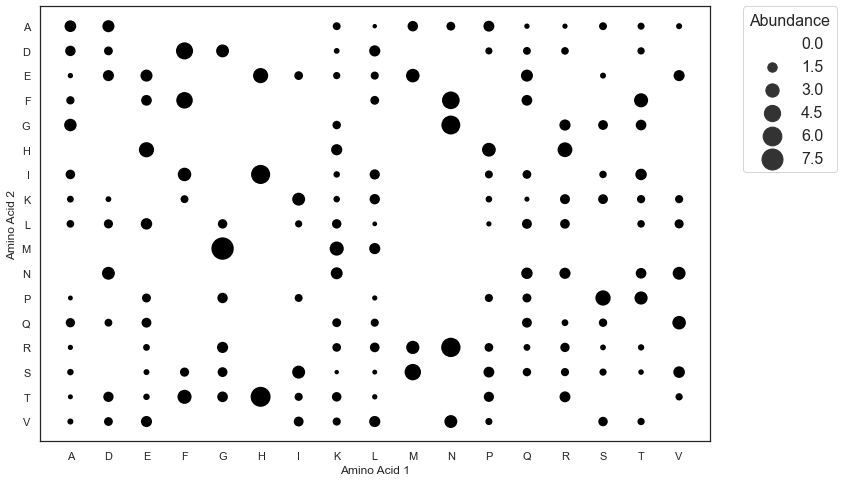

In [13]:
sns.set()
sns.set_style(style='white')

fig = plt.gcf()
fig.set_size_inches(12, 8)

#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

dmcdt1_noCWY = dmcdt1_dipeptide_table[(dmcdt1_dipeptide_table['Peptide1'] != 'C') & (dmcdt1_dipeptide_table['Peptide1'] != 'W') & (dmcdt1_dipeptide_table['Peptide1'] != 'Y')]
dmcdt1_noCWY = dmcdt1_noCWY[(dmcdt1_dipeptide_table['Peptide2'] != 'C') & (dmcdt1_dipeptide_table['Peptide2'] != 'W') & (dmcdt1_dipeptide_table['Peptide2'] != 'Y')]

ax1 = sns.scatterplot(x="Peptide1", y="Peptide2",
                     size="Observed/Expected",
                     sizes=(0, 500),
                     data=dmcdt1_noCWY.sort_values(['Peptide1', 'Peptide2']),
                     color='black')

ax1.grid(False)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=16, title='Abundance', title_fontsize=16)

plt.xlabel('Amino Acid 1')
plt.ylabel('Amino Acid 2')
#plt.savefig('Adjacent Amino Acid Abundances', bbox_inches='tight')